# Sobreajuste y regularización

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Generacion de Datos

In [2]:
np.random.seed(40)
x = np.linspace(1,5,10)
y = 0.2*x + 3 + np.random.randn(len(x))

Text(0, 0.5, 'Respuesta y')

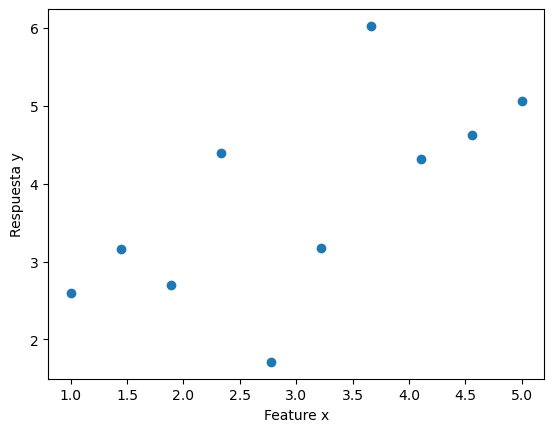

In [3]:
plt.scatter(x,y)
plt.xlabel('Feature x')
plt.ylabel('Respuesta y')

### Creación de un polinomio

In [4]:
def expand(x):
    X = pd.DataFrame()
    X['x'] = x
    X['x2'] = x**2
    X['x3'] = x**3
    X['x4'] = x**4
    X['x5'] = x**5
    X['x6'] = x**6
    X['x7'] = x**7
    X['x8'] = x**8
    X['x9'] = x**9
    X['x10'] = x**10
    return X

In [5]:
X = expand(x)

In [6]:
X.head(5)

,x,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.444444,2.086420,3.013717,4.353147,6.287880,9.082493,13.119156,18.949892,27.372066,39.537429
2,1.888889,3.567901,6.739369,12.729919,24.045403,45.419094,85.791623,162.050843,306.096037,578.181404
3,2.333333,5.444444,12.703704,29.641975,69.164609,161.384088,376.562872,878.646700,2050.175634,4783.743146
4,2.777778,7.716049,21.433471,59.537418,165.381717,459.393658,1276.093494,3544.704151,9846.400420,27351.112278


In [7]:
y

array([2.5924523 , 3.16275247, 2.69317142, 4.39538142, 1.71115452,
       3.17744202, 6.02582368, 4.31103228, 4.6213781 , 5.05553444])

### Ajuste de un modelo lineal

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [10]:
lr.coef_

array([ 4.59820301e+03, -3.53918731e+03, -1.51657639e+03,  4.44908929e+03,
       -3.43401363e+03,  1.43690287e+03, -3.62093406e+02,  5.49595186e+01,
       -4.63915295e+00,  1.67585934e-01])

In [11]:
X_pred = expand( np.linspace(1,5,100) )

In [12]:
y_pred = lr.predict(X_pred)

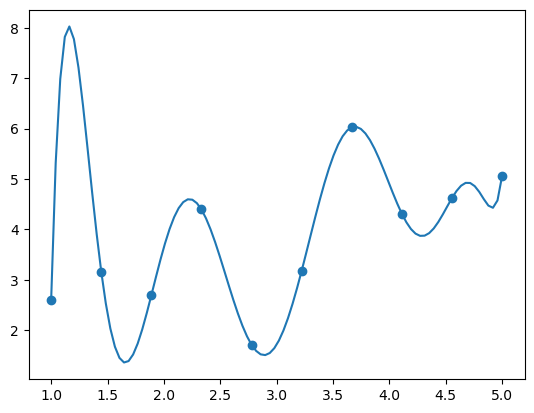

In [13]:
plt.scatter(X['x'],y)
plt.plot(X_pred['x'],y_pred)

### Ajuste modelo lineal con Regularización L1

In [14]:
from sklearn.linear_model import Lasso

In [18]:
lr1 = Lasso(max_iter=100000, alpha=0.001)
lr1.fit(X,y)

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.676e+00, tolerance: 1.565e-03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001, max_iter=100000)

In [19]:
lr1.coef_

array([ 1.43652504e+01, -6.61712768e+00,  3.65814524e-01,  2.32558857e-01,
        9.99190269e-03, -3.91491378e-03, -1.09680243e-03, -1.36960421e-04,
        4.00475652e-06,  7.64827474e-06])

In [20]:
y_pred = lr1.predict(X_pred)

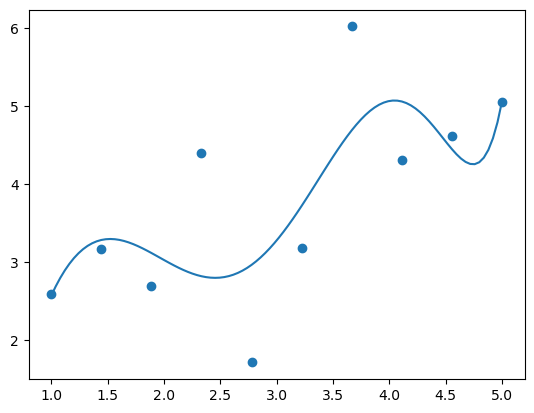

In [21]:
plt.scatter(X['x'],y)
plt.plot(X_pred['x'],y_pred)

### Ajuste modelo con regularización L2

In [22]:
from sklearn.linear_model import Ridge

In [24]:
lr2 = Ridge(alpha=0.001)
lr2.fit(X,y)

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.9348e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.001)

In [25]:
y_pred = lr2.predict(X_pred)

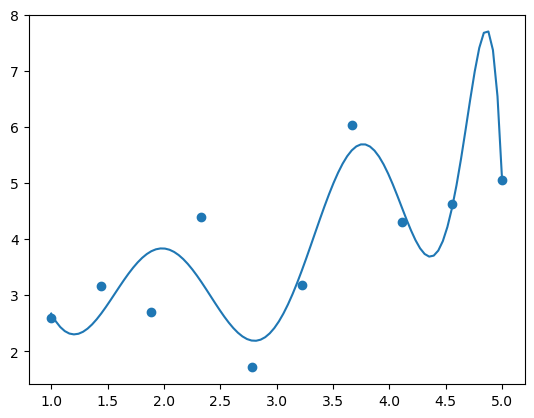

In [26]:
plt.scatter(X['x'],y)
plt.plot(X_pred['x'],y_pred)